In [63]:
import pandas as pd

In [64]:
df = pd.read_csv('C:/Users/vig10/OneDrive/Desktop/Grp_project/survey.csv')

In [65]:
import matplotlib.pyplot as plt

In [68]:
duplicates = df[df.duplicated()]
if len(duplicates) > 0:
    print("Duplicate rows exist.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [69]:
# Check for null values in each column
columns_with_null = df.isnull().any()

# Filter columns with null values
columns_with_null = columns_with_null[columns_with_null == True]

# Print columns with null values
print("Columns with null values:")
print(columns_with_null)

Columns with null values:
Age                          True
Primary streaming service    True
While working                True
Instrumentalist              True
Composer                     True
Foreign languages            True
BPM                          True
Music effects                True
dtype: bool


In [70]:
df_clean = df.dropna()

In [89]:
music_effects_counts = df_clean['Music effects'].value_counts()

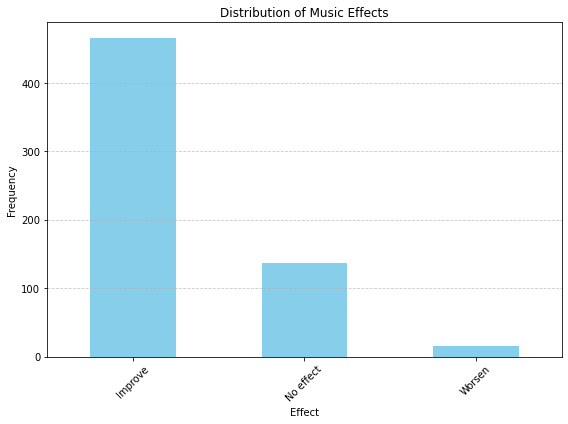

In [90]:
#Visualize music effect
plt.figure(figsize=(8, 6))
music_effects_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Music Effects')
plt.xlabel('Effect')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#There is validity to music have a good effect on people

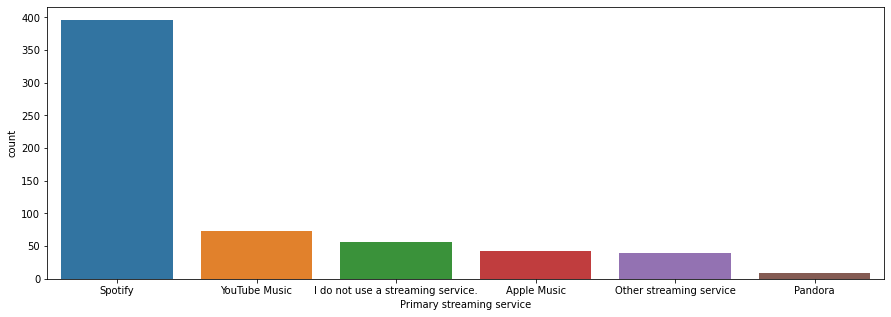

In [94]:
# Create the count plot to see which platform is used most
plt.figure(figsize=(15, 5))
sns.countplot(data=df_clean, x="Primary streaming service")
plt.show()

#Our project will focus on Spotify as the platform to focus on

<AxesSubplot:xlabel='Age', ylabel='Count'>

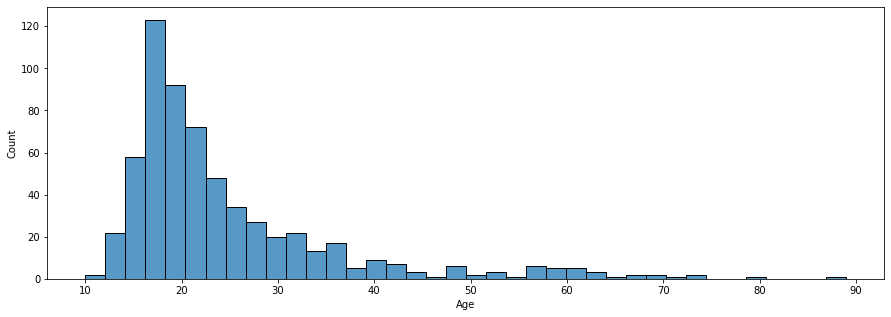

In [95]:
plt.figure(figsize=(15,5))
sns.histplot(data=df_clean,x="Age")

#There is a skew in data for the age groups

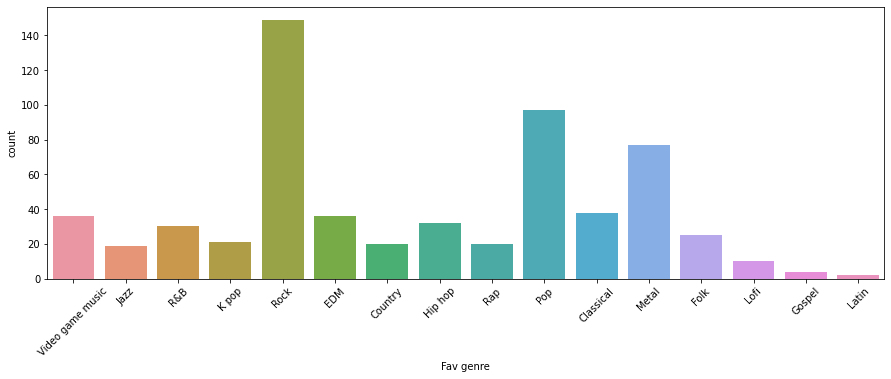

In [97]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_clean,x="Fav genre")
plt.xticks(rotation=45)
plt.show()

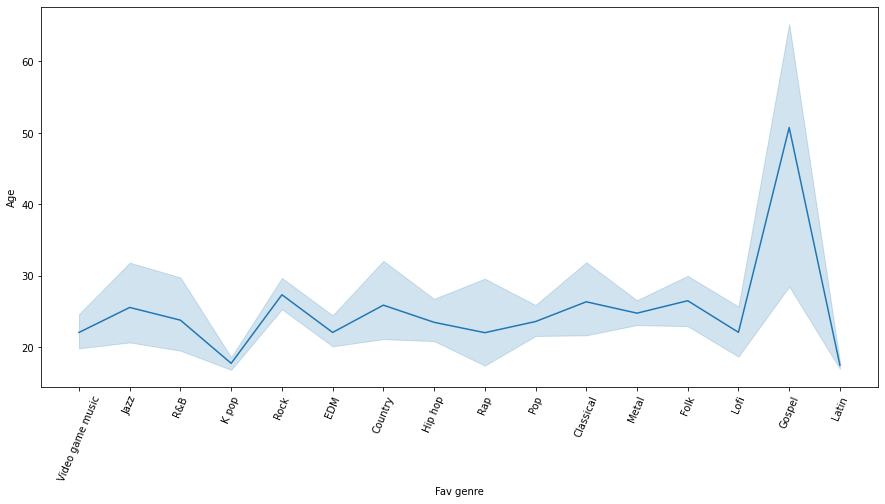

In [98]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df_clean,x="Fav genre",y="Age")
plt.xticks(rotation=67)
plt.show()

In [71]:
# Columns to exclude
exclude_columns = ['Timestamp', 'Age','Permissions','Hours per day','BPM','Anxiety','Depression','OCD','Insomnia']

# Initialize an empty dictionary to store the unique options
unique_options_per_column = {}

# Iterate over each column excluding the specified columns
for column in df_clean.columns:
    if column not in exclude_columns:
        # Drop NaN values, get the unique options, and convert to list
        unique_options = df_clean[column].dropna().unique().tolist()
        
        # Store the unique options in the dictionary
        unique_options_per_column[column] = unique_options

# Print unique options for each column
for column, unique_options in unique_options_per_column.items():
    print(f"{column}: {unique_options}")

Primary streaming service: ['Spotify', 'YouTube Music', 'I do not use a streaming service.', 'Apple Music', 'Other streaming service', 'Pandora']
While working: ['No', 'Yes']
Instrumentalist: ['No', 'Yes']
Composer: ['No', 'Yes']
Fav genre: ['Video game music', 'Jazz', 'R&B', 'K pop', 'Rock', 'EDM', 'Country', 'Hip hop', 'Rap', 'Pop', 'Classical', 'Metal', 'Folk', 'Lofi', 'Gospel', 'Latin']
Exploratory: ['No', 'Yes']
Foreign languages: ['Yes', 'No']
Frequency [Classical]: ['Never', 'Sometimes', 'Rarely', 'Very frequently']
Frequency [Country]: ['Never', 'Sometimes', 'Very frequently', 'Rarely']
Frequency [EDM]: ['Very frequently', 'Never', 'Rarely', 'Sometimes']
Frequency [Folk]: ['Never', 'Rarely', 'Sometimes', 'Very frequently']
Frequency [Gospel]: ['Never', 'Sometimes', 'Rarely', 'Very frequently']
Frequency [Hip hop]: ['Rarely', 'Never', 'Very frequently', 'Sometimes']
Frequency [Jazz]: ['Rarely', 'Very frequently', 'Never', 'Sometimes']
Frequency [K pop]: ['Very frequently', 'Some

In [72]:
# Define the options
options = ['Very frequently', 'Rarely', 'Sometimes', 'Never']

# Specify the columns you want to include
columns_to_include = [
    'Frequency [Classical]',
    'Frequency [Country]',
    'Frequency [EDM]',
    'Frequency [Folk]',
    'Frequency [Gospel]',
    'Frequency [Hip hop]',
    'Frequency [Jazz]',
    'Frequency [K pop]',
    'Frequency [Latin]',
    'Frequency [Lofi]',
    'Frequency [Metal]',
    'Frequency [Pop]',
    'Frequency [R&B]',
    'Frequency [Rap]',
    'Frequency [Rock]',
    'Frequency [Video game music]'
]

# Filter the DataFrame to include only the specified columns
df_filtered = df_clean[columns_to_include]

# Initialize an empty dictionary to store the counts
counts_per_column = {}

# Iterate over each column
for column in df_filtered.columns:
    # Count the occurrences of each option in the column
    counts = df_filtered[column].value_counts()
    
    # Filter only the options we're interested in
    filtered_counts = counts[options]
    
    # Store the filtered counts in the dictionary
    counts_per_column[column] = filtered_counts

# Convert the dictionary to a DataFrame for easier viewing
counts_df = pd.DataFrame(counts_per_column)

# Display the counts
print(counts_df)

                 Frequency [Classical]  Frequency [Country]  Frequency [EDM]  \
Very frequently                     86                   42               85   
Rarely                             223                  189              160   
Sometimes                          168                   95              122   
Never                              139                  290              249   

                 Frequency [Folk]  Frequency [Gospel]  Frequency [Hip hop]  \
Very frequently                62                  12                  114   
Rarely                        183                 112                  176   
Sometimes                     128                  44                  180   
Never                         243                 448                  146   

                 Frequency [Jazz]  Frequency [K pop]  Frequency [Latin]  \
Very frequently                48                 67                 30   
Rarely                        213                145      

In [73]:
# Define age groups
age_groups = {
    '0-20': (0, 20),
    '21-30': (21, 30),
    '31-40': (31, 40),
    '41-50': (41, 50),
    '51-60': (51, 60),
    '61 and above': (61, float('inf'))  # For ages 61 and above
}

# Function to filter rows based on age groups
def filter_rows_by_age_group(df, age_group):
    min_age, max_age = age_groups[age_group]
    return df[(df['Age'] >= min_age) & (df['Age'] <= max_age)]

In [74]:
# Define the threshold for high values
threshold = 7

# Function to filter rows based on high values in specified columns
def filter_rows_by_high_values(df, columns_to_check):
    return df[df[columns_to_check].max(axis=1) >= threshold]

In [75]:
# Function to filter rows based on 'Music Effects' being 'Improve'
def filter_rows_by_improve_music(df):
    return df[df['Music effects'] == 'Improve']

In [76]:
# Function to count occurrences of 'Very frequently' in music frequency columns for filtered rows
def count_very_frequently(df, music_frequency_columns):
    counts_per_column = {}
    for column in music_frequency_columns:
        counts = df[column].value_counts()
        counts_per_column[column] = counts.get('Very frequently', 0)
    return counts_per_column


In [77]:
# Initialize an empty dictionary to store the breakdown count by age groups and conditions
breakdown_counts = {}

# Iterate over each age group
for age_group in age_groups:
    # Initialize a dictionary to store breakdown counts for the current age group
    breakdown_counts[age_group] = {}
    
    # Iterate over each condition
    for condition in ['Anxiety', 'Depression', 'OCD', 'Insomnia']:
        # Filter rows based on age group and condition
        age_group_condition_df = filter_rows_by_age_group(df_clean, age_group)
        high_values_df = filter_rows_by_high_values(age_group_condition_df, [condition])
        improve_music_df = filter_rows_by_improve_music(high_values_df)
        
        # Count occurrences of 'Very frequently' in music frequency columns
        breakdown_counts[age_group][condition] = count_very_frequently(improve_music_df, [
            'Frequency [Classical]',
            'Frequency [Country]',
            'Frequency [EDM]',
            'Frequency [Folk]',
            'Frequency [Gospel]',
            'Frequency [Hip hop]',
            'Frequency [Jazz]',
            'Frequency [K pop]',
            'Frequency [Latin]',
            'Frequency [Lofi]',
            'Frequency [Metal]',
            'Frequency [Pop]',
            'Frequency [R&B]',
            'Frequency [Rap]',
            'Frequency [Rock]',
            'Frequency [Video game music]'
        ])

# Convert the breakdown counts to a DataFrame for easier viewing
breakdown_counts_df = pd.DataFrame(breakdown_counts)


In [78]:
# Initialize an empty dictionary to store the top categories by age groups and conditions
top_categories = {}

# Iterate over each age group
for age_group in breakdown_counts_df.columns:
    # Initialize a dictionary to store top categories for the current age group
    top_categories[age_group] = {}
    
    # Iterate over each condition
    for condition in breakdown_counts_df.index:
        # Get the breakdown counts for the current condition and age group
        breakdown_counts = breakdown_counts_df.loc[condition, age_group]
        
        # Sort the breakdown counts dictionary by values in descending order and get top 3 categories
        top_categories[age_group][condition] = dict(sorted(breakdown_counts.items(), key=lambda x: x[1], reverse=True)[:3])

# Convert the top categories to a DataFrame for easier viewing
top_categories_df = pd.DataFrame(top_categories)


In [79]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [86]:
# Convert the top categories DataFrame to a list of dictionaries
top_categories_list = top_categories_df.stack().reset_index().rename(columns={'level_0': 'Condition', 'level_1': 'Age Group', 0: 'Top Categories'})

# Remove 'Frequency' and square brackets from the column names
top_categories_list['Top Categories'] = top_categories_list['Top Categories'].apply(lambda x: {key.replace('Frequency ', '').strip('[]'): value for key, value in x.items()})

# Display the top categories using tabulate
print(tabulate(top_categories_list, headers='keys', tablefmt='pretty'))

+----+------------+--------------+---------------------------------------------+
|    | Condition  |  Age Group   |               Top Categories                |
+----+------------+--------------+---------------------------------------------+
| 0  |  Anxiety   |     0-20     |     {'Pop': 62, 'Rock': 56, 'Rap': 35}      |
| 1  |  Anxiety   |    21-30     |    {'Rock': 50, 'Pop': 34, 'Metal': 20}     |
| 2  |  Anxiety   |    31-40     |    {'Rock': 11, 'Pop': 7, 'Hip hop': 6}     |
| 3  |  Anxiety   |    41-50     |      {'Rock': 4, 'Folk': 3, 'EDM': 2}       |
| 4  |  Anxiety   |    51-60     |  {'Classical': 0, 'Country': 0, 'EDM': 0}   |
| 5  |  Anxiety   | 61 and above | {'Classical': 2, 'Country': 1, 'Gospel': 1} |
| 6  | Depression |     0-20     |     {'Pop': 31, 'Rock': 31, 'Rap': 27}      |
| 7  | Depression |    21-30     |    {'Rock': 45, 'Pop': 27, 'Metal': 18}     |
| 8  | Depression |    31-40     |   {'Rock': 8, 'Metal': 5, 'Classical': 2}   |
| 9  | Depression |    41-50

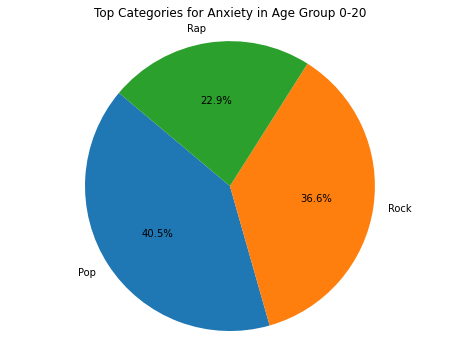

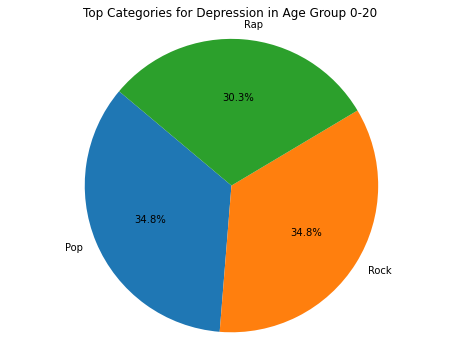

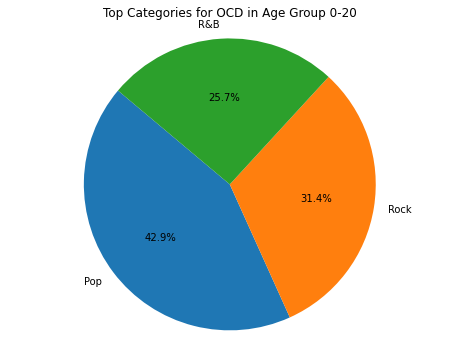

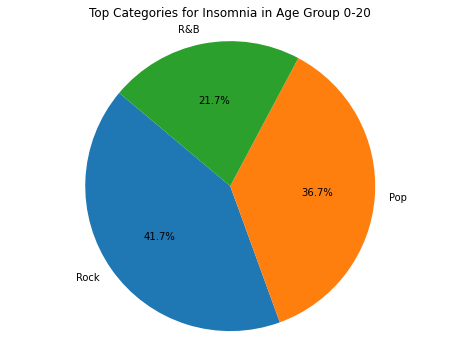

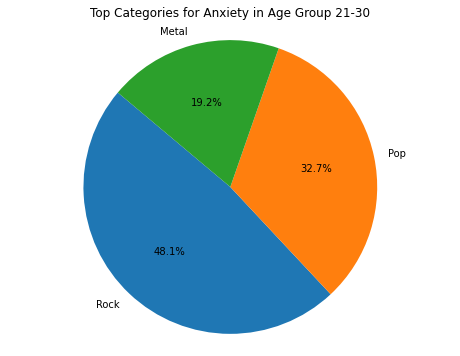

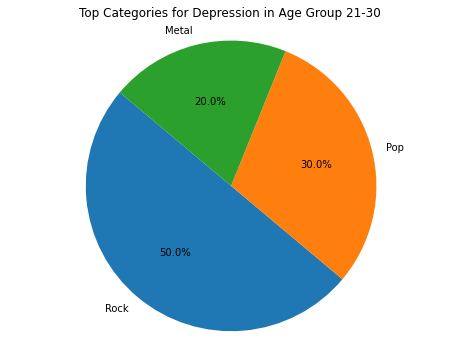

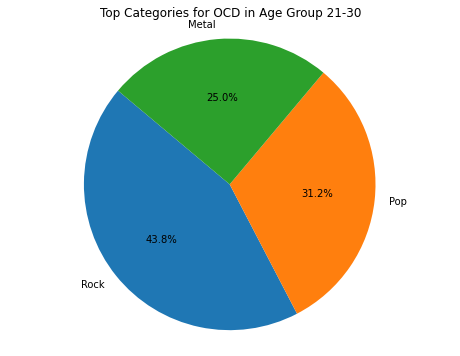

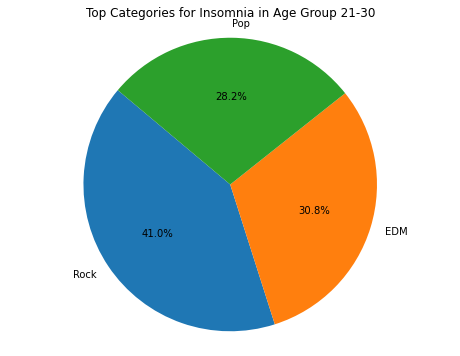

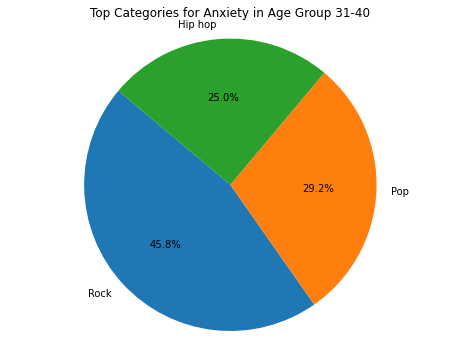

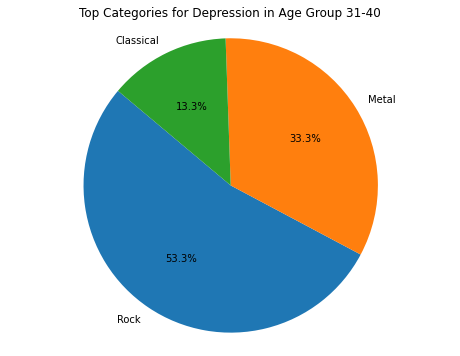

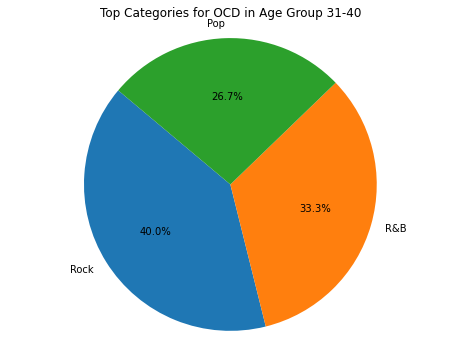

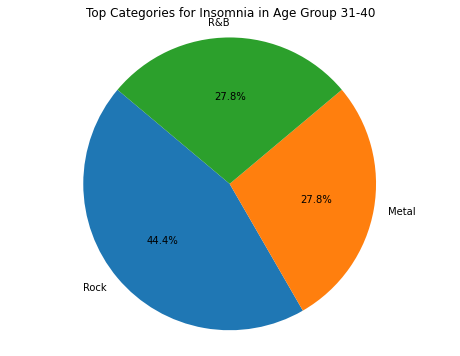

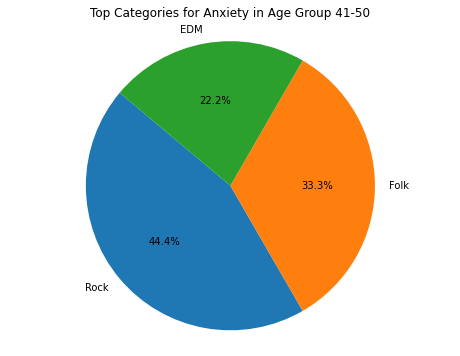

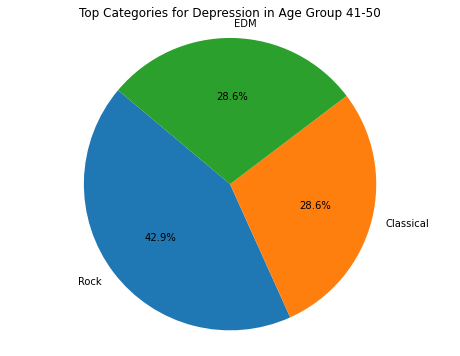

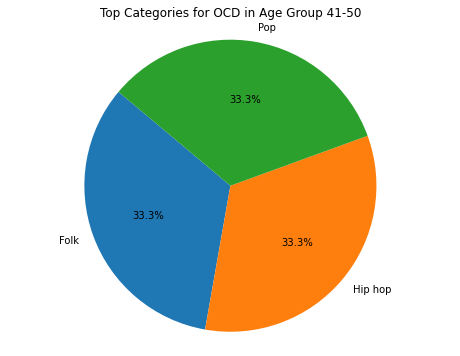

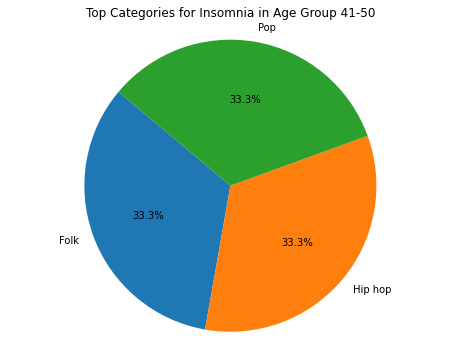

No non-zero categories found for Anxiety in Age Group 51-60
No non-zero categories found for Depression in Age Group 51-60
No non-zero categories found for OCD in Age Group 51-60


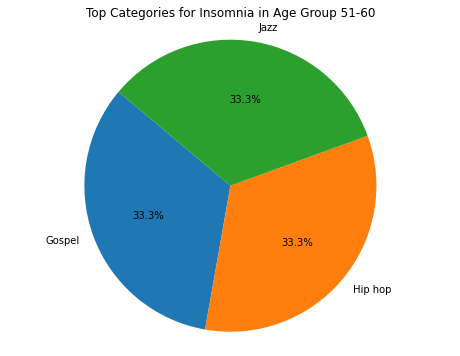

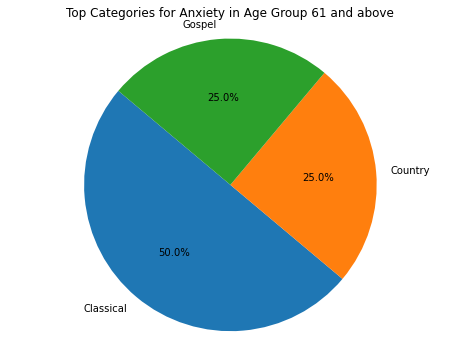

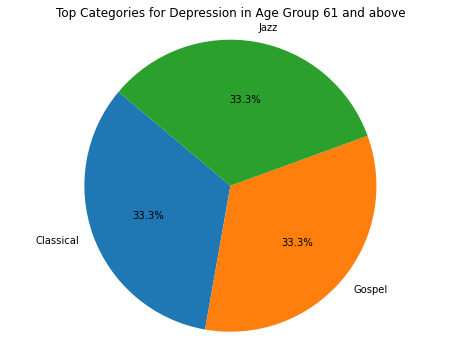

No non-zero categories found for OCD in Age Group 61 and above


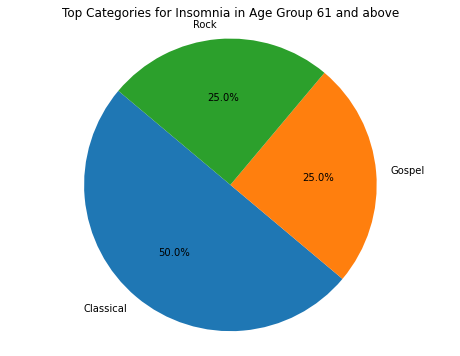

In [88]:
# Iterate over each age group
for age_group in top_categories_df.columns:
    # Iterate over each condition
    for condition in top_categories_df.index:
        # Get top categories for the current age group and condition
        top_categories = top_categories_df.loc[condition, age_group]
        
        # Filter out categories with zero counts
        top_categories_filtered = {category.replace('Frequency ', '').strip('[]'): count for category, count in top_categories.items() if count > 0}
        
        if top_categories_filtered:  # Check if there are non-zero categories
            # Create a pie chart for the top categories
            plt.figure(figsize=(8, 6))
            plt.pie(top_categories_filtered.values(), labels=top_categories_filtered.keys(), autopct='%1.1f%%', startangle=140)
            plt.title(f'Top Categories for {condition} in Age Group {age_group}')
            plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
            plt.show()
        else:
            print(f'No non-zero categories found for {condition} in Age Group {age_group}')

In [135]:
# Initialize an empty dictionary to store the top categories by age groups and conditions
top_categories = {}

# Iterate over each age group
for age_group in breakdown_counts_df.columns:
    # Initialize a dictionary to store top categories for the current age group
    top_categories[age_group] = {}
    
    # Iterate over each condition
    for condition in breakdown_counts_df.index:
        # Get the breakdown counts for the current condition and age group
        breakdown_counts = breakdown_counts_df.loc[condition, age_group]
        
        # Sort the breakdown counts dictionary by values in descending order and get top 3 categories
        top_categories[age_group][condition] = dict(sorted(breakdown_counts.items(), key=lambda x: x[1], reverse=True)[:3])

# Convert the top categories to a DataFrame for easier viewing
top_categories_df = pd.DataFrame(top_categories).T
print(top_categories_df)

                                                        Anxiety  \
0-20          {'Frequency [Pop]': 62, 'Frequency [Rock]': 56...   
21-30         {'Frequency [Rock]': 50, 'Frequency [Pop]': 34...   
31-40         {'Frequency [Rock]': 11, 'Frequency [Pop]': 7,...   
41-50         {'Frequency [Rock]': 4, 'Frequency [Folk]': 3,...   
51-60         {'Frequency [Classical]': 0, 'Frequency [Count...   
61 and above  {'Frequency [Classical]': 2, 'Frequency [Count...   

                                                     Depression  \
0-20          {'Frequency [Pop]': 31, 'Frequency [Rock]': 31...   
21-30         {'Frequency [Rock]': 45, 'Frequency [Pop]': 27...   
31-40         {'Frequency [Rock]': 8, 'Frequency [Metal]': 5...   
41-50         {'Frequency [Rock]': 3, 'Frequency [Classical]...   
51-60         {'Frequency [Classical]': 0, 'Frequency [Count...   
61 and above  {'Frequency [Classical]': 1, 'Frequency [Gospe...   

                                                            

In [61]:
# Define age groups
age_groups = {
    '0-20': (0, 20),
    '21-30': (21, 30),
    '31-40': (31, 40),
    '41-50': (41, 50),
    '51-60': (51, 60),
    '61 and above': (61, float('inf'))  # For ages 61 and above
}

# Function to filter rows based on age group
def filter_rows_by_age_group(df, age_group):
    min_age, max_age = age_groups[age_group]
    return df[(df['Age'] >= min_age) & (df['Age'] <= max_age)]

# Function to filter rows based on high values in specified columns
def filter_rows_by_high_values(df, columns_to_check, threshold):
    return df[df[columns_to_check].max(axis=1) > threshold]

# Initialize an empty dictionary to store the breakdown count by age groups and conditions
breakdown_counts = {}

# Define the threshold for high values
threshold = 7

# Iterate over each age group
for age_group, age_range in age_groups.items():
    # Filter rows based on age group
    age_group_df = filter_rows_by_age_group(df_clean, age_group)
    
    # Initialize a dictionary to store breakdown counts for the current age group
    breakdown_counts[age_group] = {}
    
    # Iterate over each condition
    for condition in ['Anxiety', 'Depression', 'OCD', 'Insomnia']:
        # Filter rows based on condition and high values
        high_values_df = filter_rows_by_high_values(age_group_df, [condition], threshold)
        
        # Count the number of rows
        breakdown_counts[age_group][condition] = len(high_values_df)

# Convert the breakdown counts to a DataFrame for easier viewing
breakdown_counts_df = pd.DataFrame(breakdown_counts)

# Display the breakdown counts
print(breakdown_counts_df)


            0-20  21-30  31-40  41-50  51-60  61 and above
Anxiety       93     77     22      7      0             3
Depression    55     55     19      7      0             1
OCD           25     22      7      0      1             0
Insomnia      46     27     12      6      3             2


In [132]:
import psycopg2
import random
import ipywidgets as widgets
from IPython.display import display, clear_output

In [131]:
# Database connection parameters
db_params = {
    "host": "localhost",
    "dbname": "music",       # Replace with your desired database name
    "user": "postgres",      # Replace with your PostgreSQL username
    "password": "admin",     # Replace with your PostgreSQL password
    "port": "5432"           # Replace with your PostgreSQL port
}

# Establish connection to the PostgreSQL database
try:
    conn = psycopg2.connect(**db_params)
    print("Connected to the database!")
    
    # Create a cursor
    cur = conn.cursor()
    
    # Now you can proceed with executing SQL queries using the cursor
    
except (Exception, psycopg2.Error) as error:
    print("Error while connecting to PostgreSQL:", error)

Connected to the database!


In [151]:
# Function to retrieve a random feeling
def get_random_feeling():
    feelings = ['Anxiety', 'Depression', 'OCD', 'Insomnia']
    return random.choice(feelings)

# Function to retrieve a random age group
def get_random_age_group():
    age_groups = {
        '0-20': (0, 20),
        '21-30': (21, 30),
        '31-40': (31, 40),
        '41-50': (41, 50),
        '51-60': (51, 60),
        '61 and above': (61, float('inf'))
    }
    return random.choice(list(age_groups.keys()))

# Function to retrieve recommended genre for a given age group
def get_recommended_genre(age_group):
    conn = connect_to_database()
    if conn:
        try:
            with conn.cursor() as cur:
                # Retrieve genre from favorite_genres table based on age group
                cur.execute("""
                    SELECT genre
                    FROM favorite_genres
                    WHERE age_group = %s
                    ORDER BY RANDOM()
                    LIMIT 1
                """, (age_group,))
                genre = cur.fetchone()
                if genre:
                    return genre[0]
                else:
                    print("No genre found for the selected age group.")
                    return None
        except psycopg2.Error as e:
            print("Error:", e)
        finally:
            conn.close()
    else:
        return None

# Function to retrieve original genre based on the standardized genre
def get_original_genre(standardized_genre):
    conn = connect_to_database()
    if conn:
        try:
            with conn.cursor() as cur:
                # Retrieve original genre from genre_mapping table based on standardized genre
                cur.execute("""
                    SELECT original_genre
                    FROM genre_mapping
                    WHERE standardized_genre = %s
                """, (standardized_genre,))
                original_genre = cur.fetchone()
                if original_genre:
                    return original_genre[0]
                else:
                    print("No original genre found for the selected standardized genre.")
                    return None
        except psycopg2.Error as e:
            print("Error:", e)
        finally:
            conn.close()
    else:
        return None

# Function to retrieve random song details for a given original genre
def get_random_song_details(original_genre):
    conn = connect_to_database()
    if conn:
        try:
            with conn.cursor() as cur:
                # Retrieve random song details for the selected original genre
                cur.execute("SELECT * FROM recommended_tracks WHERE genre = %s ORDER BY RANDOM() LIMIT 1", (original_genre,))
                song_details = cur.fetchone()
                if song_details:
                    return song_details
                else:
                    print("No recommended tracks found for the selected genre.")
                    return None
        except psycopg2.Error as e:
            print("Error:", e)
        finally:
            conn.close()
    else:
        return None

# Function to retrieve random song details from all genres
def get_random_song_details_from_all():
    conn = connect_to_database()
    if conn:
        try:
            with conn.cursor() as cur:
                # Retrieve random song details from all genres
                cur.execute("SELECT * FROM recommended_tracks ORDER BY RANDOM() LIMIT 1")
                song_details = cur.fetchone()
                if song_details:
                    return song_details
                else:
                    print("No recommended tracks found.")
                    return None
        except psycopg2.Error as e:
            print("Error:", e)
        finally:
            conn.close()
    else:
        return None
    
# Function to suggest a song based on mood and age group
def suggest_song(mood, age_group):
    try:
        print("Mood:", mood)
        print("Age group:", age_group)

        if mood == 'Random':
            # Get a random song directly from the recommended_tracks table
            song_details = get_random_song_details_from_all()
            if song_details:
                print("Recommended song:", song_details)
                return
            else:
                print("No recommended song found.")
                return

        if age_group:
            # Check if the selected age group has breakdown counts for any condition
            if age_group in top_categories_df.index:
                # Step 1: Get the recommended genre based on age group
                genre = get_recommended_genre(age_group)
                if genre:
                    print("Recommended genre:", genre)

                    # Step 2: Get the original genre based on the recommended genre
                    standardized_genre = get_original_genre(genre)
                    if standardized_genre:
                        print("Standardized genre:", standardized_genre)

                        # Step 3: Get a random song based on the original genre
                        song_details = get_random_song_details(standardized_genre)
                        if song_details:
                            print("Recommended song:", song_details)
                        else:
                            print("No recommended song found for the selected genre.")
                    else:
                        print("No standardized genre found for the selected genre.")
                else:
                    print("No recommended genre found for the selected age group.")
            else:
                # Provide a random song recommendation since there are no breakdown counts for the selected age group
                print("No breakdown counts available for the selected age group. Providing a random song recommendation.")
                song_details = get_random_song_details_from_all()
                if song_details:
                    print("Recommended song:", song_details)
                else:
                    print("No recommended song found.")
        else:
            print("No age group selected.")
    except Exception as e:
        print("Error:", e)

In [165]:
# Create dropdown widgets for feeling and age group
feeling_dropdown = widgets.Dropdown(
    options=['Random', 'Anxiety', 'Depression', 'OCD', 'Insomnia'], 
    description='How are you feeling today?', 
    value=None, 
    style={'description_width': 'initial', 'color': 'black'}
)

age_group_dropdown = widgets.Dropdown(
    options=['', '0-20', '21-30', '31-40', '41-50', '51-60', '61 and above'], 
    description='Age Group:', 
    value='', 
    style={'description_width': 'initial', 'color': 'black'}
)

refresh_button = widgets.Button(description="Refresh")
output_area = widgets.Output()

# Display the widgets
display(widgets.VBox([feeling_dropdown, age_group_dropdown, refresh_button, output_area]))

# Function to handle dropdown changes
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        if feeling_dropdown.value and age_group_dropdown.value:
            if feeling_dropdown.value != 'Random':
                with output_area:
                    clear_output(wait=True)
                    suggest_song(feeling_dropdown.value, age_group_dropdown.value)
            else:
                with output_area:
                    clear_output(wait=True)
                    suggest_song(feeling_dropdown.value, None)

                    # Function to handle refresh button click
def on_refresh_button_click(b):
    with output_area:
        clear_output(wait=True)
        # Reset dropdown values to None
        feeling_dropdown.value = None
        age_group_dropdown.value = None


# Register the functions to be called on widget changes
feeling_dropdown.observe(on_change)
age_group_dropdown.observe(on_change)
refresh_button.on_click(on_refresh_button_click)